Copyright 2019 - for intercal Census use only

Note: click "Runtime" then "Run all"
# Background

## Quick Pandas Reference

**Load UCI Adult Dataset as a Pandas DataFrame**

In [1]:
import pandas as pd
names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
adult_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None, names=names, sep=",\s+", na_values="?", verbose=True, engine='python')
public_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",header=None, names=names, sep=",\s+", na_values="?", verbose=True, skiprows=[0], engine='python')

Filled 1836 NA values in column workclass
Filled 1843 NA values in column occupation
Filled 583 NA values in column native-country
Filled 963 NA values in column workclass
Filled 966 NA values in column occupation
Filled 274 NA values in column native-country


**Explore the dataframe**



In [2]:
print("Columns Information:")
print(adult_df.info())
print("")
print("Summary statistics of Private dataset:")
print(adult_df.describe())
print("")
print("Summary statistics of Public dataset:")
print(public_df.describe())


Columns Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Summary statistics of Private dataset:
                age        fnlwgt  ...  capital-loss  hours-per-week
count  32561.000000  3.256100e+04  ...  32561.000000    32561.000000
mean      38.581647  1.897784e+05  ...     

**Access a specific value**

In [3]:
adult_df.at[0,'age']

39

**Select a subset of rows**

In [4]:
adult_df[0:4]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


**Select a subset of rows and columns**

If you want all rows, just use 
```python
adult_df[['age', 'workclass']]
```

If you just want the age column:
```python
adult_df.age
```

In [5]:
adult_df[1:4][['age', 'workclass']]


,age,workclass
1,50,Self-emp-not-inc
2,38,Private
3,53,Private


**Query Selection**
Get all rows where the workclass is missing.
The method .head(5) only then gets the frist 5 rows

In [6]:
adult_df[pd.isna(adult_df.workclass)].head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K


**Query Selection** get records with age 18, then count the number of non-missing values for each column

In [7]:
adult_df[adult_df.age == 18].count()

age               550
workclass         458
fnlwgt            550
education         550
education-num     550
marital-status    550
occupation        455
relationship      550
race              550
sex               550
capital-gain      550
capital-loss      550
hours-per-week    550
native-country    542
income            550
dtype: int64

**Group By Queries**

In [8]:
adult_df.groupby(['marital-status']).mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
marital-status,,,,,,
Divorced,43.041639,185802.790457,10.030385,728.414810,64.600720,41.246680
Married-AF-spouse,32.478261,188165.565217,10.173913,432.652174,0.000000,41.130435
Married-civ-spouse,43.247596,186763.172877,10.320646,1764.859509,122.439103,43.284856
Married-spouse-absent,40.578947,193141.760766,9.308612,653.983254,57.779904,39.669856
Never-married,28.150988,195383.308996,9.962464,376.588318,52.345502,36.939998
Separated,39.354146,206444.325854,9.293659,535.568780,58.110244,39.301463
Widowed,58.975831,174159.042296,9.093656,571.071501,79.666667,32.979859


**Get numpy array**

In [9]:
adult_df.age.values


array([39, 50, 38, ..., 58, 22, 52])

## Differential Privacy Tools

**The Laplace Mechanism**
The input is mu - a number or a numpy array, along with the privacy budget epsilon and sensitivity of the query that produced mu.
For example, we can call it as 
```python
laplace_mech(33.5, epsilon=1.0, sensitivity=2.0)
laplace_mech(np.array([1.0, 2.1, 3.4]), epsilon=1.0, sensitivity=2.0)
```

In [0]:
import numpy as np
def laplace_mech(mu, epsilon, sensitivity=1.0):
    """ laplace mechanism, only for research purposes, not production"""
    eps = epsilon/float(sensitivity)
    scale = 1/eps
    np_shape = np.shape(mu)
    shape = None if np_shape == () else np_shape
    z = np.random.laplace(0.0, scale=scale, size=shape)
    return mu + z


**The Noisy Max Mechansim** 

Given a set of queries, this mechanism will return the **index**, not the value, of the query that is probably largest.
*Recall, indexes in python start at 0*
We can call this function like:
```python
noisy_max(np.array([100, 200, 1]), epsilon=0.01, sensitivity=2.0)
```
most of the time we expect the output to be 1

In [0]:
def noisy_max(answers: np.ndarray, epsilon: float, sensitivity: float):
    """ Noisy max with gap using Laplace noise"""
    noisy_answers = laplace_mech(answers, epsilon/2.0, sensitivity)
    return noisy_answers.argmax()


**The Above Threshold Mechanism (Sparse Vector Technique)**

Given a list of queries, and a threshold T, this mechanism will start from one end of the list and return the **index** of the first query it encounters that is probably above the threshold. The forward parameter tells us if we want to start checking from the front of the list (forward=True) or from the back (forward=False). For example:
```python
querylist = [100, 1, 2, 3, 4, 5, 6, 99];    epsilon=1;    sensitivity=1.0
above_threshold(querylist, 50, epsilon, sensitivity, True)  # will probably return 0
above_threshold(querylist, 50, epsilon, sensitivity, False)  # will probably return 7
above_threshold(querylist, 200, epsilon, sensitivity, True)  # will probably return None
```


In [0]:
def above_threshold(querylist, T, epsilon, sensitivity=1.0, forward=True):
    """ Above threshold technique for a list of queries with a given sensitivity """
    bud_share = epsilon/3.0
    noisy_T = laplace_mech(T, bud_share, sensitivity)
    noisy_answers = laplace_mech(querylist, bud_share, sensitivity)
    num_queries = len(querylist)
    myiter = range(num_queries) if forward else range(num_queries-1, -1, -1)
    index = next((x for x in myiter if noisy_answers[x] >= noisy_T), None)
    return index

**Error Evaluation**
How can we estimate the error of a differentially private algorithm? We use a **public** dataset, run the algorithm multiple times on it and compute the mean squared error (for example). The following function mse allows us to do that. Suppose we have a function called my_mechanism that we would like to call like
```python
my_mechanism(true_answer, epsilon, sensitivity, p1, p2 , p3) # p1, p2, p3 are some other parameters
```
and we would like to estimate its accuracy. We take a **public** dataset, compute true_answer from it and then call mse by telling it the true answer, the function we want to test and the parameters the function takes:
```
mse(true_answer, my_mechanism, true_answer, epsilon, sensitivity, p1, p2, p3)
```

For example, calling
```python
mse(true_answer, laplace_mech, true_answer, 1.0, 1.0)
```
estimates the mean squared error of the Laplace Mechanism with epsilon=1.0 and senstiivity=1.0. It will return a number around 2.

In [0]:
def mse(true_answer, function_name, *params):
  """true_answer is either a scalar or numpy array"""
  niterations = 100_000
  return sum(np.sum((true_answer - function_name(*params))**2) for x in range(niterations)) / float(niterations)

# Warmup - Worrying about sensitivity and visualizing errors.


## Long code block (can hide it)

In [0]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression

#this function converts an age list into a histogram h
# h[x] is the number of people with age x
def make_age_histogram(mydata): 
    h = np.zeros(101)
    for x in mydata:
      h[x] += 1
    return h

# get the male, female, and combined histograms
male_ages = make_age_histogram(adult_df[adult_df.sex=="Male"]["age"].values)
female_ages = make_age_histogram(adult_df[adult_df.sex=="Female"]["age"].values)
all_ages = make_age_histogram(adult_df["age"].values)

def plot_them(true_cdf, noisy_cdf, inference_cdf, plotter,title):
    X = np.arange(true_cdf.size)
    error1 = np.abs(noisy_cdf - true_cdf).sum() / 101.0
    error2 = np.abs(inference_cdf - true_cdf).sum() / 101.0
    plotter.plot(X, true_cdf, "--k", label="True CDF")
    plotter.plot(X, noisy_cdf, "-r", label=f"Privacy (error={int(error1)})")
    plotter.plot(X,inference_cdf,"-g", label=f"Privacy + Inference (error={int(error2)})")
    plotter.title.set_text(title)
    plotter.legend()
    
# this function takes an age histogram, adds noise to each cell, sets negative numbers to 0
# then computes the cumulative sum and performs isotonic regression. You will need to give it
# the correct sensitivity.
def cdf_method0(h, epsilon, sensitivity, plotter=None, title=None):
  noisy_h = laplace_mech(h, epsilon, sensitivity).clip(min=0.0)
  noisy_cdf = np.cumsum(noisy_h)
  X = np.arange(h.size)
  fitted = IsotonicRegression(y_min=0).fit(X, noisy_cdf).predict(X)
  if plotter is not None:
    plot_them(np.cumsum(h), noisy_cdf, fitted, plotter, title)
  return fitted



# this function takes an age histogram, adds noise to each cell, then computes the cumulative sum
# followed by isotonic regression. you will need to give it the correct sensitivity
def cdf_method1(h, epsilon, sensitivity, plotter=None, title=None):
  noisy_h = laplace_mech(h, epsilon, sensitivity)
  noisy_cdf = np.cumsum(noisy_h)
  X = np.arange(h.size)
  fitted = IsotonicRegression(y_min=0).fit(X, noisy_cdf).predict(X)
  if plotter is not None:
    plot_them(np.cumsum(h), noisy_cdf, fitted, plotter, title)
  return fitted

# this function takes an age histogram, computes the cdf, then adds noise to it
# followed by isotonic regression you will need to give it the correct sensitivity
def cdf_method2(h, epsilon, sensitivity, plotter=None, title=None):
  cdf = np.cumsum(h)
  noisy_cdf = laplace_mech(cdf, epsilon, sensitivity)
  X = np.arange(h.size)
  fitted = IsotonicRegression(y_min=0).fit(X, noisy_cdf).predict(X)
  if plotter is not None:
    plot_them(cdf, noisy_cdf, fitted, plotter, title)
  return fitted


# this function computes private versions of the male age cdf, female age cdf, 
# and all age cdfs. It does this by adding noise to each histogram cell and then
# postprocesses this noisy histogram by converting neative numbers to 0,
# computing the CDF and performing isotonic
# regression. You must compute the correct sensitivity

def all_method0(epsilon, sensitivity):
  fig = plt.figure(figsize=(15,6))
  ax1=fig.add_subplot("131")
  ax2=fig.add_subplot("132")
  ax3=fig.add_subplot("133")
  cdf_method0(male_ages, epsilon, sensitivity, ax1, "Male Cumulative Sum")
  cdf_method0(female_ages, epsilon, sensitivity, ax2, "Female Cumulative Sum")
  cdf_method0(all_ages, epsilon, sensitivity, ax3, "All Cumulative Sum")
  fig.suptitle(f"********** Method 0: epsilon={epsilon}, sensitivity={sensitivity} **********", size='xx-large')
  fig.show()



# this function computes private versions of the male age cdf, female age cdf, 
# and all age cdfs. It does this by adding noise to each histogram cell and then
# postprocesses this noisy histogram by computing the CDF and performing isotonic
# regression. You must compute the correct sensitivity

def all_method1(epsilon, sensitivity):
  fig = plt.figure(figsize=(15,6))
  ax1=fig.add_subplot("131")
  ax2=fig.add_subplot("132")
  ax3=fig.add_subplot("133")
  cdf_method1(male_ages, epsilon, sensitivity, ax1, "Male Cumulative Sum")
  cdf_method1(female_ages, epsilon, sensitivity, ax2, "Female Cumulative Sum")
  cdf_method1(all_ages, epsilon, sensitivity, ax3, "All Cumulative Sum")
  fig.suptitle(f"********** Method 1: epsilon={epsilon}, sensitivity={sensitivity} **********", size='xx-large')
  fig.show()
  
# this function computes private versions of the male age cdf, female age cdf, 
# and all age cdfs. It does this by first computing the CDF and adding noise to 
# the cdf. It then postprocesses the noisy cdf by performing isotonic
# regression. You must compute the correct sensitivity

def all_method2(epsilon, sensitivity):
  fig = plt.figure(figsize=(15,6))
  ax1=fig.add_subplot("131")
  ax2=fig.add_subplot("132")
  ax3=fig.add_subplot("133")
  cdf_method2(male_ages, epsilon, sensitivity, ax1, "Male Cumulative Sum")
  cdf_method2(female_ages, epsilon, sensitivity, ax2, "Female Cumulative Sum")
  cdf_method2(all_ages, epsilon, sensitivity, ax3, "All Cumulative Sum")
  fig.suptitle(f"********** Method 2: epsilon={epsilon}, sensitivity={sensitivity} **********", size='xx-large')
  fig.show()



  

## Instructions
An **age histogram** is a histogram h such that h[x] is the number of people who are x years old.

A **cumulative age histogram** is a histogram g such that g[x] is the number of people who are x years old or younger.

There are at least 3 methods for generating differentially private cumulative age histograms:

*   **Method 0**
    1.   Preprocessing: None
    2.   Privacy step: Add Laplace noise to the age histogram
    3.   Postprocessing steps on the noisy age histogram: 
         * Set negative numbers to 0
         * Compute the cumulative sum

*   **Method 1**
    1.   Preprocessing: None
    2.   Privacy step: Add Laplace noise to the age histogram
    3.   Postprocessing steps on the noisy age histogram: 
         * Compute the cumulative sum (i.e. Do not set negative counts to 0)
         * Peform isotonic regression so that the result is non-decreasing (**consistency inference step**)

*   **Method 2**
    1. Preprocessing: take the cumulative sum of the age histogram
    2. Privacy step: Add Laplace noise to the cumulative sum histogram
    3. Postprocessing steps on the noisy cumulative sum:
       * Perform isotonic regression so that the result is non-decreasing (**consistency inference step**)
       
 ### The Data Release Goal 
 
 Suppose we want to simultaneously release three differentially private cumulative age histograms for (1) the female population, (2) the male population and (3) the combined population.
 
 If we were to use **Method 0** the privacy step involves adding noise to 3 age histograms (i.e. the query being answered is "what are the values in those three histograms").
 
 If we were to use **Method 1** the privacy step also involves adding noise to 3 age histograms (so the query being answered is also "what are the values in those three histograms").
 
 If we were to use **Method 2** the privacy step involves adding noise to 3 cumulative sum histograms (so the query being answered is "what are the values in those cumulative sums").
 
 
 ### The Assignment

Whichever method we pick, we must compute the sensitivity of the corresponding query. In the code cells  below, you will lines like:

```python
sensitivity_for_method0 = 1.0 # Modify this to be the correct sensitivity
sensitivity_for_method1 = 1.0 # Modify this to be the correct sensitivity
sensitivity_for_method2 = 1.0 # Modify this to be the correct sensitivity
```

Fill in the correct values for the sensitivities and then run the code cell. You will see a plot of

1. The true cumulative sum for female, male, all
2. The differentially private cumulative sum  for female, male, all **before** inference
3. The differentially private cumulative sum for female, male, **after** inference

Each plot also displays the per-cell absolute error between the DP cumulative sums and the true one.

Try running the code cell multiple times due to the variabiltiy of these methods to see what happens.

Note: there are better algorithms available than these 3 methods. Can you think of some approaches based on what you have learned?

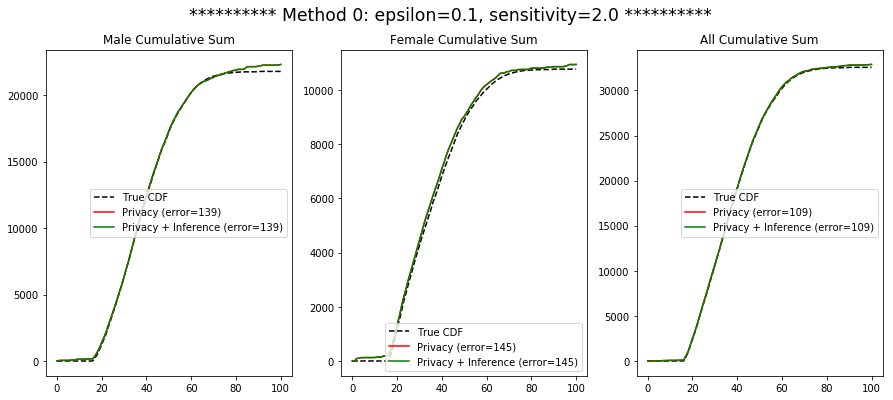

In [30]:
# Method 0
epsilon = 0.1
sensitivity_for_method0 = 2.0 # Modify this to be the correct sensitivity
all_method0(epsilon, sensitivity_for_method0);



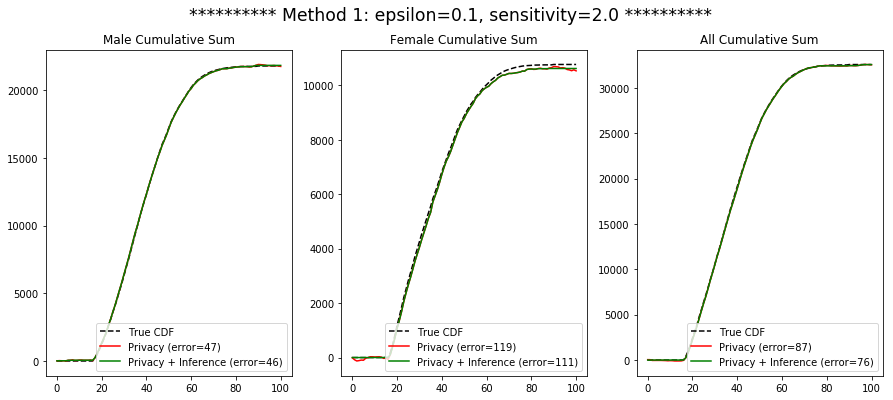

In [34]:
# Method 1

epsilon = 0.1
sensitivity_for_method1 = 2.0 # Modify this to be the correct sensitivity
all_method1(epsilon, sensitivity_for_method1);



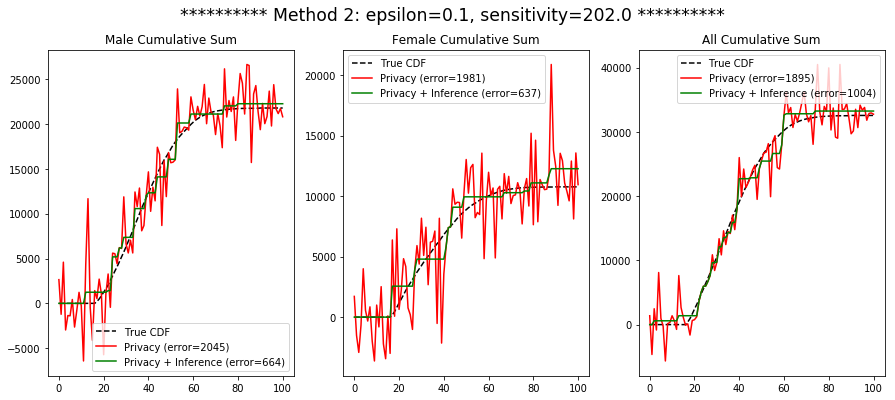

In [35]:
# Method 2
epsilon = 0.1
sensitivity_for_method2 = 202.0 # Modify this to be the correct sensitivity
all_method2(epsilon, sensitivity_for_method2); 

# Exercises with Basic DP Applications

## Problem 1: Tuning budget allocation and dp average

Suppose we are interested in the average age of a population. One way of estimating the average is to 
1. get an estimate of the total age (by adding Laplace noise to it), 
2. get an estimate of the total number of people (by adding Laplace noise)
3. dividing the two estimate. 
To do this, we need to take our total privay budget eps and split it into two pieces: one for estimating the numerator (eps_n) and another for estimating the denominator (eps_d). Note eps = eps_n + eps_d. One could use code such as:

```python
noisy_top = laplace_mechanism(true_top, eps_n, 100.0) # assuming ages are topcoded at 100
noisy_bot= laplace_mechanism(noisy_bot, eps_d, 1.0) # sensitivity of bottom is 1
answer = noisy_top / noisy_bot
```

The choice of eps_n and eps_d clearly affects accuracy. How should we tune them? One way is to get a public dataset that we believe is similar and use it to determine a good choice.

The following code loads up a public dataset and estimate the accuracy of the average given your chocies of eps_n and eps_d. Your goal is to find a good choice of these parameters, subject to eps_n+eps_d = 1. Plug in different values for eps_n and eps_d to see how low you can make the estimated mse. Ideally you would write a function that tries out a bunch of different values and returns the best one it has found.



In [18]:
class Problem1: # so that variables do not interfere with later problems
  # you modify these two lines
  eps_n = 0.5 
  eps_d = 0.5

  # code that checks the quality of your choices
  assert eps_n + eps_d <= 1.0000000001, "eps_n + eps_d must be at most 1"
  public_ages = public_df['age'].values # get the ages from the public data
  topcoded_ages = public_ages.clip(0, 100) #ensure ages are between 0 and 100
  public_numerator = topcoded_ages.sum()  # get the sum of the ages
  public_denominator = float(topcoded_ages.size)  # get the total number of people

  def dp_average(eps_n, eps_d, top, bot, top_sen=100.0, bot_sen=1.0): # differentially private mean
      noisy_top = laplace_mech(top, eps_n, top_sen)
      noisy_bot = laplace_mech(bot, eps_d, bot_sen)
      return noisy_top / noisy_bot
  
  # Compute mse of our choice:
  answer = mse(public_numerator/public_denominator, dp_average, eps_n, eps_d, public_numerator, public_denominator)
  print("mse is ", answer)
  
  

mse is  0.00034433335181159884


## Problem 2: DP Variance

In this exercise the goal is to estimate a differentially private (population) variance of the ages. The following code shows how you can do it in a non-private way.
You should fill in the body of the dp_variance function to compute a differentially private estimate of the age variance.
The input to the function is the list of ages, and an epsilon. You must decide which quantities need noise and how to allocate the privacy budget between them.
 You should tune your code on the public data and then apply it to the secret data.

In [47]:
class Problem2: # so that variables do not interfere with later problems
  public_ages = public_df["age"].values.clip(0, 100) # a list of ages of each person in public file, topcoded at 100
  secret_ages = adult_df["age"].values.clip(0, 100) # a list of ages of each person in the private file, topcoded at 100

  public_age_sum = public_ages.sum() # sum of the ages
  public_age_sum_squares = (public_ages * public_ages).sum() # sum over pointwise multiplication
  n = float(public_ages.size) # sample size

  public_var = public_age_sum_squares/n  - (public_age_sum/n)**2 # average of sum of squares minus square of average 
  print("Public age variance: ", public_var)

  def dp_variance(age_list, epsilon):
    noisy_n = laplace_mech(age_list.size, 0.3333333, 1.0)
    noisy_sum_sq = laplace_mech((age_list * age_list).sum(), 0.3333333, 100.0**2)
    noisy_sum = laplace_mech(age_list.sum(), 0.33333333, 100.0)
    return noisy_sum_sq/noisy_n - (noisy_sum/noisy_n)**2

  #print your error here
  print(Problem2.dp_variance(Problem2.public_ages,1.0))

Public age variance:  191.78819481474602
189.78082746057248


## Problem 3: Mean Absolute Deviation




In this exercise the goal is to estimate a differentially private MAD of the ages (mean absolute deviation). It is like variance but we take the absolute value instead of squaring it: $\frac{1}{n}\sum_i |x_i - \bar{x}|$. Consider at least 2 ways of creating a differentially private MAD.

First, we can try to add noise to the intermediate computations (e.g., compute noisy mean and then plug it into the MAD formula then add noise to the result of the formula)

Second, can we plug in a noisy version of n in palce of the true sample size and then directly compute the sensitivity of the MAD formula (if we can, then we could just add noise to the final result)?

In [20]:
class Problem3: # so that variables do not interfere with later problems
  public_ages = public_df["age"].values.clip(0, 100) # a list of ages of each person in public file, topcoded at 100
  secret_ages = adult_df["age"].values.clip(0, 100) # a list of ages of each person in the private file, topcoded at 100
  
  public_age_sum = public_ages.sum() # sum of the ages
  public_n = float(public_ages.size)
  mean_public_age = public_age_sum / public_n
  public_deviation = public_ages - mean_public_age
  public_mad = np.abs(public_deviation).sum() / public_n
  
  print("Public MAD is", public_mad)
  
  def dp_mad(age_list, epsilon):
    pass #put your code here
  
  #print your error here

Public MAD is 11.352363746853433


## Problem 4: Covariance Matrix
In this exercise, the goal is to estimate an **uncentered** differentially private covariance matrix.
The code shows how to get a matrix where each row is a data record. In the example below,
the matrix has two columns, the age column and income column. The matrix should look like this

[[25, 0]

 [30, 0]

[31, 1]

...      
]

meaning that the first record has age 25 and income <= 50k, the second record has age 30 and income <=50k, the third record has age 31 and income > 50k.
Age is bounded between 0 and 100. Income is either 0 or 1.

Your goal is to estimate the uncentered covariance matrix:


[ 
  E[age * age],     E[age * income]

 E[income * age],   E[income * income]
]

Note that you will need to be a little more clever here because income can change by 1 but age can change by 100.
You do not want to add noise with scale 100 to, for example, your estimate of E[income * income].
It is better when all columns of the data are affected by one person in the same way. How can you achieve this?

In [21]:
class Problem4:   # so that variables do not interfere with later problems
  def clean(x):
    if type(x) == type(""):
      result = 0 if '<' in x else 1
    else:
      result = min(max(0.0, x), 100.0)
    return result
  # The variable age_income is a 2-d array. The first column is the Age
  # The second column is 0 if income <= 50k and 1 if income >= 50k
  age_income = public_df[["age", "income"]].replace({"income" : {"<=50K.": 0, "<=50K": 0, ">50K.": 1, ">50K": 1}}).values.astype(np.float)
  n = float(age_income.size)
  # np.dot does matrix multiplication
  print("nonprivate answer:\n", np.dot(age_income.transpose(), age_income) / n)
  
  def uncov(data, epsilon):
    pass #put your code here
  
  #print your error here

nonprivate answer:
 [[8.47352036e+02 5.23558135e+00]
 [5.23558135e+00 1.18113138e-01]]


## Problem 5: Yet Another Average

Another way to compute the differentially private average age is to take a histogram on age, add noise to every cell, and then use it to compute the average. The following code shows the nonprivate version. Create the differentially private version and compare it to our previous method of computing average age.

In [22]:
class Problem5:
  # this function takes a list of ages and returns an age histogram
  def make_age_histogram(mydata):
    h = np.zeros(101)
    for x in mydata:
      h[x] += 1
    return h
  # the following is a histogram: age_array[x] is the number of people with age x
  age_hist = make_age_histogram(public_df[["age"]].values)
  #the following code creates an array [0, 1, ..., 100]
  counting = np.arange(0, 101)
  #the following line multiplies the age histogram by "counting" (elementwise) and sums it
  numerator = (age_hist * counting).sum() #equals: sum_x (x * number_of_people_with_age_x)
  denominator = float(age_hist.sum()) # total number of people
  print("nonprivate average age:", numerator/denominator)
  
  def dp_age_via_histogram(myhist, epsilon):
    pass # put your code here

nonprivate average age: 38.76745900128985
